In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential, Model,load_model
from keras.layers import Dense, Input
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


In [2]:
#read the datset and display the first 6 records
dataset = pd.read_csv('/media/nbm/New Volume/Msc_courses/ML-BDU/SWE_PPT/Sample_codes/adoption_elearning/uni.csv')
dataset.head(10)

,easy_to_learn,Internet_speed,covid19-protection,exam_copy,save_time,quality_improve,student_view
0,1,0,1,1,2,2,pos
1,1,0,1,1,2,2,pos
2,1,0,1,1,2,2,pos
3,1,0,1,1,2,2,pos
4,1,0,1,1,2,2,pos
5,1,0,1,1,2,2,pos
6,0,0,1,1,2,0,neg
7,0,0,1,0,2,0,neg
8,0,1,1,0,2,0,neg
9,0,1,1,0,2,0,neg


In [3]:
#Splitting the data into training and test test
X = dataset.iloc[:,0:6].values 
y = dataset.iloc[:,6].values

In [4]:
X


array([[1, 0, 1, 1, 2, 2],
       [1, 0, 1, 1, 2, 2],
       [1, 0, 1, 1, 2, 2],
       [1, 0, 1, 1, 2, 2],
       [1, 0, 1, 1, 2, 2],
       [1, 0, 1, 1, 2, 2],
       [0, 0, 1, 1, 2, 0],
       [0, 0, 1, 0, 2, 0],
       [0, 1, 1, 0, 2, 0],
       [0, 1, 1, 0, 2, 0],
       [0, 1, 1, 0, 2, 0],
       [0, 1, 1, 0, 2, 0],
       [0, 1, 1, 0, 2, 0],
       [0, 1, 1, 0, 2, 0],
       [1, 0, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1],
       [1, 2, 1, 1, 1, 1],
       [1, 2, 1, 1, 1, 1],
       [1, 2, 1, 1, 1, 1],
       [1, 2, 1, 1, 1, 1],
       [1, 2, 1, 1, 1, 1],
       [1, 2, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1],
       [1, 0, 1, 1, 0, 1],
       [1, 0, 1, 1, 0, 1],
       [1, 0, 1, 1, 0, 1],
       [0, 1, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 0],
 

In [5]:
y

array(['pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg',
       'neg', 'neg', 'neg', 'neg', 'neg', 'new', 'new', 'new', 'new',
       'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new',
       'new', 'new', 'new', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg',
       'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos',
       'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos'], dtype=object)

In [6]:
y.shape

(52,)

In [6]:
# to transform the string class to catagorical int
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

In [7]:
y1

array([2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
Y = pd.get_dummies(y1).values #one-hot encoding

In [10]:
Y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [9]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [10]:
#we can use either of the two models
input_shape=(6,)
input_data=Input(shape=input_shape, dtype='float32')
x1= Dense(30, activation='relu') (input_data)
x2= Dense(10, activation='relu') (x1)
x3= Dense(5, activation='relu') (x2)
output= Dense(3, activation='softmax') (x3)
model=Model(input_data, output)

In [12]:
# Model
model = Sequential()

# first input layer with first hidden layer in a single statement
model.add( Dense(30, input_shape=(6,), activation='relu') )
# 30 is the size(no. of neurons) of first hidden layer, 5 is the no. of features in the input layer
# input_shape=(6,)  can also be written as   input_dim=5 and it is the number of column/feature

# second hiden layer
model.add(Dense(10,activation='relu')) # 10 = no. of neurons in second hidden layer

# third hiden layer
model.add(Dense(5,activation='relu')) # 5 = no. of neurons in third hidden layer

# ouput layer
model.add(Dense(3,activation='softmax')) # 3 = no. of neurons in output layer as three categories of labels are there (posetive,negative and neutral)


In [11]:
# "categorical_crossentropy" for multiclass classification problems
# the compile statement can also be written as:-
model.compile(optimizer=Adam(lr=0.04), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 6)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 18        
Total params: 593
Trainable params: 593
Non-trainable params: 0
_________________________________________________________________


In [14]:
y_train


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [14]:
#Training the model and predicting 
hist=model.fit(X_train, y_train,  batch_size=5,
                     epochs=50, verbose=1, validation_split=0.1)



Train on 36 samples, validate on 5 samples
Epoch 1/50
36/36 [==============================] - 0s 624us/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.0153 - val_accuracy: 1.0000
Epoch 2/50
36/36 [==============================] - 0s 416us/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 3/50
36/36 [==============================] - 0s 997us/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 4/50
36/36 [==============================] - 0s 1ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0132 - val_accuracy: 1.0000
Epoch 5/50
36/36 [==============================] - 0s 471us/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 6/50
36/36 [==============================] - 0s 861us/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 7/50
36/36 [==============================] - 0s 975us/step - loss: 0.0091 - accuracy: 1.0000 - val_l

In [15]:
#alternativly  we can train by saving intermidate models
checkpoint = ModelCheckpoint('model_elearning{epoch:01d}.hdf5', period=4)
hist=model.fit(X_train, y_train,  batch_size=5,
                     epochs=20, verbose=1, validation_split=0.1,callbacks=[checkpoint])

Train on 36 samples, validate on 5 samples
Epoch 1/20
36/36 [==============================] - 0s 528us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 2/20
36/36 [==============================] - 0s 452us/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 3/20
36/36 [==============================] - 0s 843us/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 4/20
36/36 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 5/20
36/36 [==============================] - 0s 683us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 6/20
36/36 [==============================] - 0s 570us/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 7/20
36/36 [==============================] - 0s 497us/step - loss: 0.0025 - accuracy: 1.0000 - val_l

In [18]:
# to save the model to the disk
model.save('model_final.hdf5')

In [19]:
# to load them model from disk
model_final = load_model('model_elearning8.hdf5')

In [20]:
y_pred = model_final.predict(X_test)
y_test_class = np.argmax(y_test,axis=1) # convert encoded labels into classes: say [0, 0, 1] -->  [2] i.e posetive
y_pred_class = np.argmax(y_pred,axis=1) # convert predicted labels into classes: say [0.00023, 0.923, 0.031] -->  [1] i.e. negative

#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
score = model.evaluate(X_test, y_test) #evaluate() Returns the loss value &  metrics values for the model in test mode

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

[[4 0 0]
 [0 2 0]
 [0 0 5]]
11/11 [==============================] - 0s 75us/step


In [21]:
y_test_class

array([1, 0, 2, 1, 0, 2, 0, 0, 2, 2, 2])

In [22]:
y_pred_class

array([1, 0, 2, 1, 0, 2, 0, 0, 2, 2, 2])

In [23]:
from keras.utils.vis_utils import plot_model

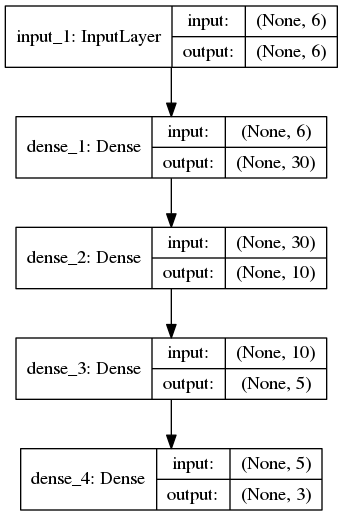

In [24]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

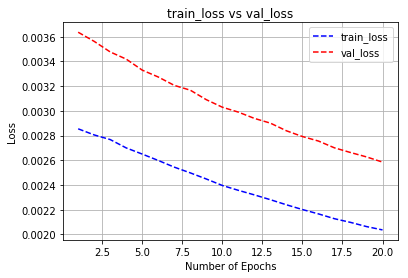

In [25]:
    epochs=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
    train_loss=hist.history['loss']
    val_loss=hist.history['val_loss']
    #print(train_loss)
    #print(val_loss)
    plt.title('train_loss vs val_loss')
    plt.rcParams['figure.facecolor'] = 'White'
    plt.grid(True)
    plt.plot(epochs, train_loss, 'b--')
    plt.plot(epochs, val_loss, 'r--')
    plt.legend(['train_loss', 'val_loss'], loc='upper right')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')
    plt.show()

In [26]:
train_loss=hist.history['loss']

In [27]:
train_loss

[0.00285475529340652,
 0.0028054076747644607,
 0.0027678250496844864,
 0.002700215562476337,
 0.0026503586074492582,
 0.0025986353955684332,
 0.002544636327204191,
 0.0024982072600828863,
 0.0024487714431921225,
 0.0023962680097611155,
 0.00235700005557899,
 0.002320150619804432,
 0.0022811945252922466,
 0.0022400593598932675,
 0.002201617131908683,
 0.002166343029885967,
 0.002127323143415399,
 0.002097702375875896,
 0.0020637240440919413,
 0.0020366706450861078]